In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textstat

In [2]:
# Program to read the entire file (absolute path) using read() function
caseNo='Case1'
file_path = 'Research Data/'+caseNo+'.txt'


In [3]:
### Parse to a list of Dicts
def parse_prompt_response(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    pairs = content.split('---END_OF_PAIR---')
    data = []
    
    for pair in pairs:
        if '---PROMPT_START---' in pair and '---RESPONSE_START---' in pair:
            prompt, response = pair.split('---RESPONSE_START---', 1)
            prompt = prompt.split('---PROMPT_START---', 1)[-1].strip()
            response = response.strip()
            data.append({'prompt': prompt, 'response': response})
    
    return data

pairs = parse_prompt_response(file_path)



In [4]:
df=pd.DataFrame(pairs)
df.head()

,prompt,response
0,I am planning to visit to Rotorua new Zealand,Rotorua is a fantastic destination with a lot ...
1,"What are the main attractions in Rotorua, and ...","Rotorua has several standout attractions, each..."
2,What are the best natural places to visit in R...,Rotorua is brimming with natural wonders beyon...
3,What are some of the top cultural experiences ...,"Rotorua is rich in Maori culture and heritage,..."
4,What outdoor adventure activities are popular ...,Rotorua is a fantastic destination for outdoor...


In [5]:
print(df['prompt'])

0         I am planning to visit to Rotorua new Zealand
1     What are the main attractions in Rotorua, and ...
2     What are the best natural places to visit in R...
3     What are some of the top cultural experiences ...
4     What outdoor adventure activities are popular ...
5     My budget is 2000NZD for 2 adult and 3 kids wh...
6     What accommodations are available in Rotorua, ...
7                           I am planning to you by car
8     What should visitors know about the local Maor...
9     Are there any unique shopping experiences or l...
10    What safety tips or precautions should visitor...
Name: prompt, dtype: object


In [6]:
df.shape

(11, 2)

In [7]:
#all_prompts = "\n".join(df['prompt'].tolist())
all_prompts = "\n".join(f'"{prompt}"' for prompt in df['prompt'])

print(all_prompts)

"I am planning to visit to Rotorua new Zealand"
"What are the main attractions in Rotorua, and what makes each one unique?"
"What are the best natural places to visit in Rotorua?"
"What are some of the top cultural experiences or Maori heritage sites in Rotorua?"
"What outdoor adventure activities are popular in Rotorua?"
"My budget is 2000NZD for 2 adult and 3 kids what are the options for night stay?"
"What accommodations are available in Rotorua, and what are the options for different budgets?"
"I am planning to you by car"
"What should visitors know about the local Maori culture and traditions before visiting Rotorua?"
"Are there any unique shopping experiences or local crafts that visitors should explore in Rotorua?"
"What safety tips or precautions should visitors take while exploring Rotorua’s"


# lexical diversity python

In [8]:
%pip install lexicalrichness

Note: you may need to restart the kernel to use updated packages.


### MLTD
#### Return Measure of Textual Lexical Diversity (MTLD).

In [9]:
from lexicalrichness import LexicalRichness

def mtld(text):
    lex = LexicalRichness(text)
    return lex.mtld()

mtld(all_prompts)

52.430403658779085

In [10]:
df['mtld'] = df['prompt'].apply(mtld)
df.head()

,prompt,response,mtld
0,I am planning to visit to Rotorua new Zealand,Rotorua is a fantastic destination with a lot ...,22.68
1,"What are the main attractions in Rotorua, and ...","Rotorua has several standout attractions, each...",47.32
2,What are the best natural places to visit in R...,Rotorua is brimming with natural wonders beyon...,10.00
3,What are some of the top cultural experiences ...,"Rotorua is rich in Maori culture and heritage,...",14.00
4,What outdoor adventure activities are popular ...,Rotorua is a fantastic destination for outdoor...,8.00


### moving average type-token ratio (MATTR)

In [11]:

from lexicalrichness import LexicalRichness

def mattr(text):
    lex = LexicalRichness(text)
    return lex.mattr(window_size=25)

mattr(all_prompts)

0.8400000000000001

# word count.

In [12]:

def word_count(text):
    lex = LexicalRichness(text)
    return lex.words

word_count(all_prompts)


130

### unique word count.

In [13]:

def unique_word_count(text):
    lex = LexicalRichness(text)
    return lex.terms

unique_word_count(all_prompts)


74

In [14]:
def hd_d(text):
    lex = LexicalRichness(text)
    return lex.hdd()

hd_d(all_prompts)

0.7481436985807682

# Create DF

In [ ]:
case_numbers=[1,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,31,32,34,36,38,40,41,42]

scores = []

for i in case_numbers:
    file_path = 'Research Data/Case'+str(i)+'.txt'
    
    pairs = parse_prompt_response(file_path)
    df=pd.DataFrame(pairs)
    all_prompts = "\n".join(f'"{prompt}"' for prompt in df['prompt'])
    
    scores.append({'Case No':i,'Word Count':word_count(all_prompts),'Unique Word Count':unique_word_count(all_prompts),'MTLD':mtld(all_prompts),'MATTR':mattr(all_prompts),'HD-D':hd_d(all_prompts)})
    
    
df = pd.DataFrame(scores)
df.head()

,Case No,Word Count,Unique Word Count,MTLD,MATTR,HD-D
0,1,130,74,52.430404,0.840000,0.748144
1,3,108,65,35.334320,0.811905,0.764934
2,6,270,135,63.787600,0.886341,0.805660
3,7,117,83,95.377016,0.901935,0.859849
4,8,74,52,61.500000,0.874400,0.789769


In [16]:
# Insert Participant and ParticipantNo column
df['Participant'] = ['P' + str(i) for i in range(1, len(df) + 1)]
df['ParticipantNo'] = [i for i in range(1, len(df) + 1)]
df.head()

,Case No,Word Count,Unique Word Count,MTLD,MATTR,HD-D,Participant,ParticipantNo
0,1,130,74,52.430404,0.840000,0.748144,P1,1
1,3,108,65,35.334320,0.811905,0.764934,P2,2
2,6,270,135,63.787600,0.886341,0.805660,P3,3
3,7,117,83,95.377016,0.901935,0.859849,P4,4
4,8,74,52,61.500000,0.874400,0.789769,P5,5


In [17]:
df1=df[[ 'Word Count', 'Unique Word Count', 'MTLD', 'MATTR', 'HD-D']]

In [18]:
print(df1.head())

   Word Count  Unique Word Count       MTLD     MATTR      HD-D
0         130                 74  52.430404  0.840000  0.748144
1         108                 65  35.334320  0.811905  0.764934
2         270                135  63.787600  0.886341  0.805660
3         117                 83  95.377016  0.901935  0.859849
4          74                 52  61.500000  0.874400  0.789769


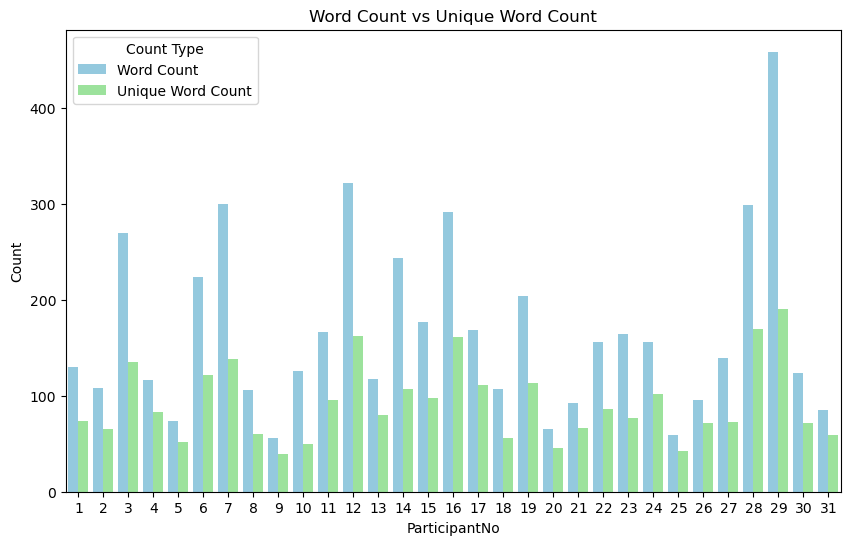

In [19]:
# Reshape the DataFrame to a long format
df_melted = pd.melt(df, id_vars='ParticipantNo', value_vars=['Word Count', 'Unique Word Count'],
                    var_name='Count Type', value_name='Count')

# Create the bar plot with bars side by side
plt.figure(figsize=(10, 6))
sns.barplot(x='ParticipantNo', y='Count', hue='Count Type', data=df_melted, palette=['skyblue', 'lightgreen'])

# Set plot labels and title
plt.ylabel('Count')
plt.title('Word Count vs Unique Word Count')

# Show the plot
plt.show()

/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py

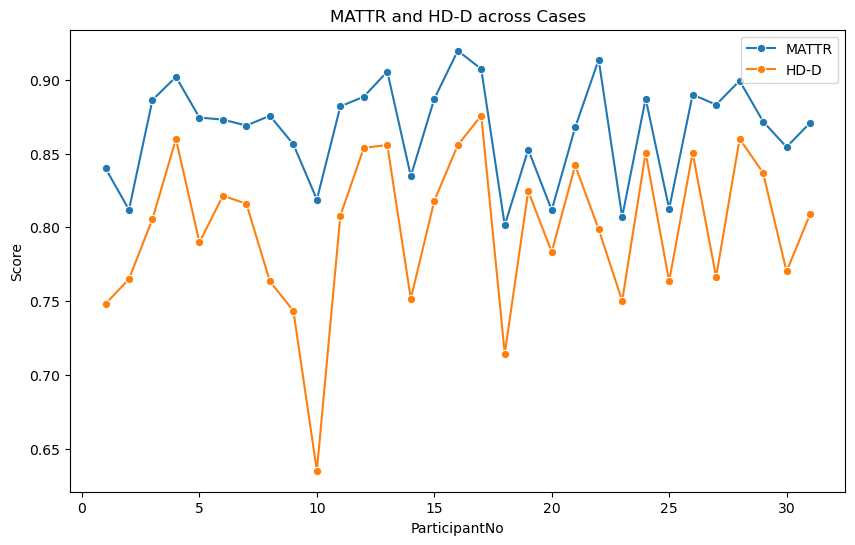

In [20]:
# Create a line plot to observe trends for MATTR and HD-D across Case Nos
plt.figure(figsize=(10, 6))
sns.lineplot(x='ParticipantNo', y='MATTR', data=df, marker='o', label='MATTR')
sns.lineplot(x='ParticipantNo', y='HD-D', data=df, marker='o', label='HD-D')
plt.ylabel('Score')
plt.title('MATTR and HD-D across Cases')
plt.legend()
plt.show()

/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


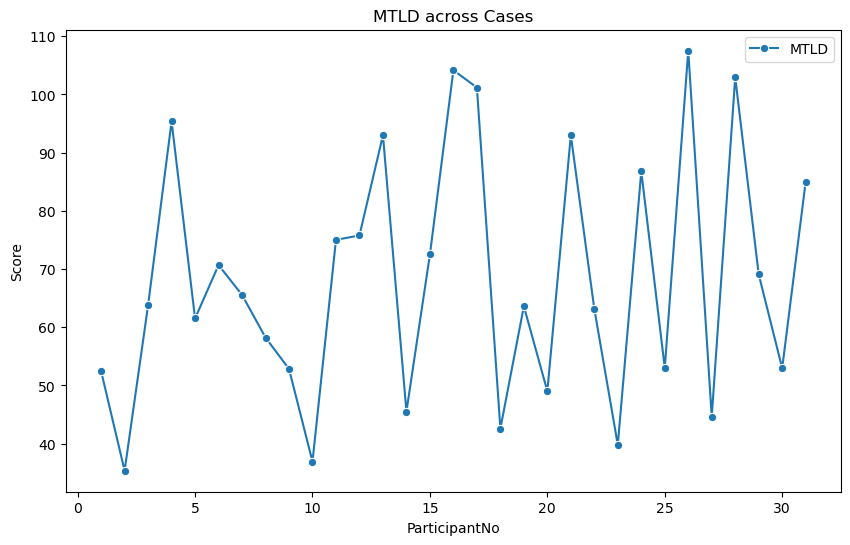

In [21]:
# Create a line plot to observe trends for MATTR and HD-D across Case Nos
plt.figure(figsize=(10, 6))
sns.lineplot(x='ParticipantNo', y='MTLD', data=df, marker='o', label='MTLD')
plt.ylabel('Score')
plt.title('MTLD across Cases')
plt.legend()
plt.show()

# Readability

In [ ]:

scores = []

for i in case_numbers:
    file_path = 'Research Data/Case'+str(i)+'.txt'
    
    pairs = parse_prompt_response(file_path)
    df=pd.DataFrame(pairs)
    all_prompts = all_prompts = "\n".join(f'"{prompt if prompt.endswith((".", "?")) else prompt + "."}"' for prompt in df['prompt'])
    all_responses = "\n".join(f'"{response}"' for response in df['response'])
    
    scores.append({'CaseNo':i,'Prompt_count':len(df),'Word_Count':word_count(all_prompts),'unique_word_count':unique_word_count(all_prompts),'mtld':mtld(all_prompts),'mattr':mattr(all_prompts),'HD-D':hd_d(all_prompts),'Prompt_readability':textstat.flesch_reading_ease(all_prompts),'Response_readability':textstat.flesch_reading_ease(all_responses)})
    
    
df = pd.DataFrame(scores)
df.head()

,CaseNo,Prompt_count,Word_Count,unique_word_count,mtld,mattr,HD-D,Prompt_readability,Response_readability
0,1,11,130,74,52.430404,0.840000,0.748144,67.76,54.12
1,3,9,108,65,35.334320,0.811905,0.764934,76.11,44.44
2,6,10,270,135,63.787600,0.886341,0.805660,87.11,59.19
3,7,6,117,83,95.377016,0.901935,0.859849,83.25,62.88
4,8,7,74,52,61.500000,0.874400,0.789769,96.89,66.84



# Visualization

In [23]:
df2=df.copy()

# Insert Participant and ParticipantNo column
df2['Participant'] = ['P' + str(i) for i in range(1, len(df) + 1)]
df2['ParticipantNo'] = [i for i in range(1, len(df) + 1)]

In [24]:
df2=df2[['Participant', 'ParticipantNo', 'Prompt_count', 'Word_Count', 'unique_word_count', 'mtld',
       'mattr', 'HD-D', 'Prompt_readability', 'Response_readability']]

df2.head()

,Participant,ParticipantNo,Prompt_count,Word_Count,unique_word_count,mtld,mattr,HD-D,Prompt_readability,Response_readability
0,P1,1,11,130,74,52.430404,0.840000,0.748144,67.76,54.12
1,P2,2,9,108,65,35.334320,0.811905,0.764934,76.11,44.44
2,P3,3,10,270,135,63.787600,0.886341,0.805660,87.11,59.19
3,P4,4,6,117,83,95.377016,0.901935,0.859849,83.25,62.88
4,P5,5,7,74,52,61.500000,0.874400,0.789769,96.89,66.84


In [25]:
df2.to_excel('df2.xlsx')

In [26]:
df2['Prompt_count'].max()

36

/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


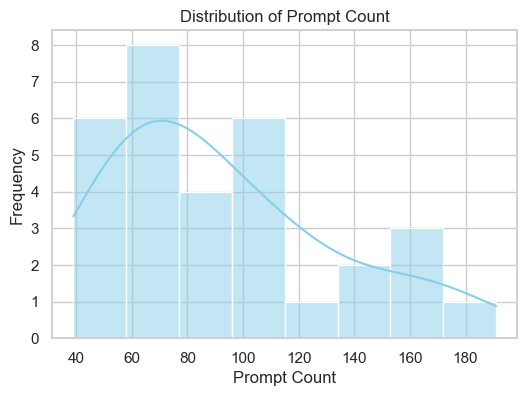

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Plot histogram and KDE for the distribution of Word_Count
plt.figure(figsize=(6, 4))

# Histogram with KDE
sns.histplot(df2['unique_word_count'], kde=True, bins=8, color='skyblue')

# Set labels and title
plt.xlabel('Prompt Count')
plt.ylabel('Frequency')
plt.title('Distribution of Prompt Count')
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the columns 'mtld', 'mattr', 'HD-D' and create new columns for z-scores
df[['mtld_z', 'mattr_z', 'HD-D_z']] = scaler.fit_transform(df[['mtld', 'mattr', 'HD-D']])

# Calculate the composite index by taking the mean of the z-scores
df['lexical_diversity_index'] = df[['mtld_z', 'mattr_z', 'HD-D_z']].mean(axis=1)


In [29]:
df.head()

,CaseNo,Prompt_count,Word_Count,unique_word_count,mtld,mattr,HD-D,Prompt_readability,Response_readability,mtld_z,mattr_z,HD-D_z,lexical_diversity_index
0,1,11,130,74,52.430404,0.840000,0.748144,67.76,54.12,-0.740141,-0.786525,-0.988934,-0.838533
1,3,9,108,65,35.334320,0.811905,0.764934,76.11,44.44,-1.544864,-1.626284,-0.665821,-1.278990
2,6,10,270,135,63.787600,0.886341,0.805660,87.11,59.19,-0.205551,0.598610,0.117918,0.170325
3,7,6,117,83,95.377016,0.901935,0.859849,83.25,62.88,1.281382,1.064711,1.160747,1.168947
4,8,7,74,52,61.500000,0.874400,0.789769,96.89,66.84,-0.313230,0.241682,-0.187883,-0.086477


In [30]:
df_merge = df.drop(['mtld', 'mattr', 'HD-D','mtld_z', 'mattr_z', 'HD-D_z'], axis=1)

In [31]:
df_merge.describe()

,CaseNo,Prompt_count,Word_Count,unique_word_count,Prompt_readability,Response_readability,lexical_diversity_index
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01
mean,20.451613,11.161290,168.000000,92.193548,77.630323,58.665806,2.250888e-15
std,11.712781,5.598195,93.650414,40.481617,9.821840,5.596946,9.461182e-01
min,1.000000,6.000000,56.000000,39.000000,55.300000,44.440000,-2.018932e+00
25%,11.500000,8.000000,106.500000,62.500000,72.205000,55.135000,-7.697797e-01
50%,19.000000,10.000000,140.000000,80.000000,77.840000,57.870000,1.703255e-01
75%,28.500000,13.000000,214.000000,112.000000,84.675000,62.830000,6.835323e-01
max,42.000000,36.000000,459.000000,191.000000,96.890000,68.870000,1.457208e+00


In [32]:
df_merge.to_csv('LexicalAnalysis.csv')

In [33]:
df_merge[df_merge['CaseNo']==10]

,CaseNo,Prompt_count,Word_Count,unique_word_count,Prompt_readability,Response_readability,lexical_diversity_index
6,10,16,300,138,77.87,53.51,0.090799
